In [1]:
import sys
sys.executable

'/Users/b/bio/cardiac/model1/new_env/bin/python'

In [3]:
import pyabf
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


In [4]:
# Function to plot phases based on given start and end times
def plot_phases(sweepX, sweepY, phase_times):
    plt.figure(figsize=(15, 6))
    
    # Define colors for each phase
    colors = {
        0: "red",
        1: "orange",
        2: "yellow",
        3: "green",
        4: "blue"
    }
    
    # Plot the original signal
    plt.plot(sweepX, sweepY, label="Original Signal", color='black')
    
    # Plot each phase with a distinct color
    for phase, (start_time, end_time) in enumerate(phase_times):
        phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
        plt.plot(sweepX[phase_indices], sweepY[phase_indices], '.', color=colors[phase], label=f"Phase {phase}")
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (pA or mV)")
    plt.title("Action Potential Phases")
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:

def save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index):
    # Save phase times and derivatives to CSV
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File Path', 'Phase', 'Start Time (s)', 'End Time (s)', 'X Values', 'Y Values', 'Sweep Index'])
        for phase, (start_time, end_time) in enumerate(phase_times):
            phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
            phase_x_values = sweepX[phase_indices].tolist()
            phase_y_values = sweepY[phase_indices].tolist()
            writer.writerow([file_path, phase, start_time, end_time, phase_x_values, phase_y_values, random_sweep_index])
    
    print(f"Phase times and x,y saved to {csv_file_path}")

In [6]:
#read the file
# Define the path to the Excel file
excel_file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/manifest.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Select the "filename" column
filenames = df['filename']

# Choose a random filename
random_filename = random.choice(filenames)

file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/" + random_filename
print(f"Randomly chosen filename: {random_filename}")

# Load the ABF file
abf = pyabf.ABF(file_path)

# Get the total number of sweeps
sweep_count = abf.sweepCount

# Choose a random sweep index
random_sweep_index = random.randint(0, sweep_count - 1)
print(f"Randomly chosen sweep index: {random_sweep_index}")

Randomly chosen filename: sub-10-9-2019/sam-2019-10-09-0001/2019_10_09_0001.abf
Randomly chosen sweep index: 160


In [ ]:
########### USER INPUT #####################

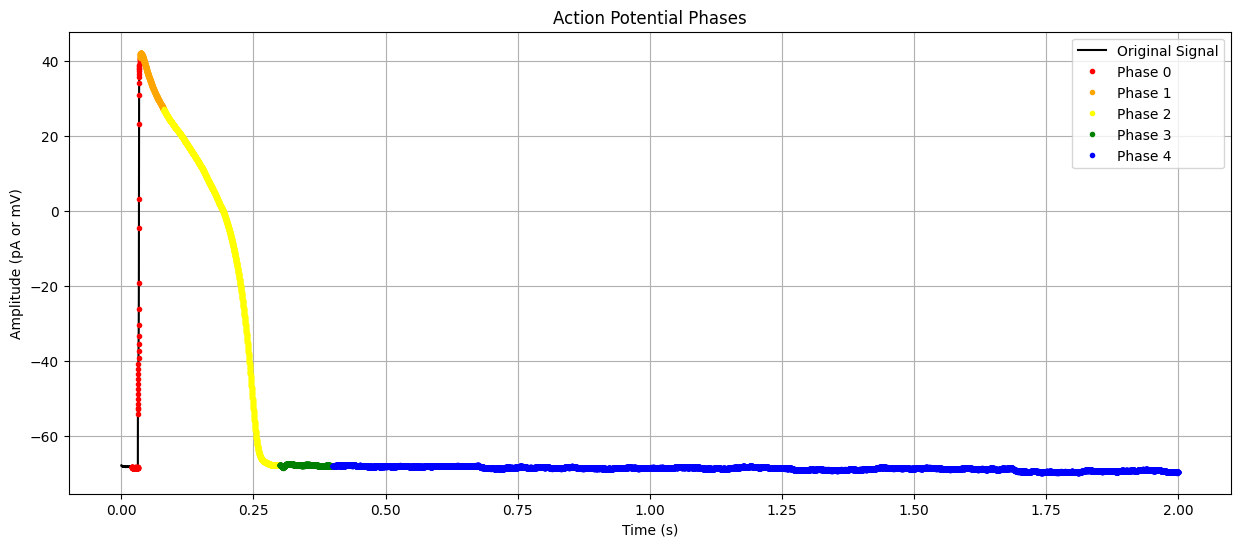

In [7]:
abf.setSweep(random_sweep_index)
sweepX = abf.sweepX
sweepY = abf.sweepY


# Define the phase times (start_time, end_time) for each phase
phase_times = [
    (0.02, 0.035),  # Phase 0
    (0.035, 0.08),  # Phase 1
    (0.08, 0.30),  # Phase 2
    (0.30, 0.40),  # Phase 3
    (0.40, 2.0)   # Phase 4
]

# Plot the phases
plot_phases(sweepX, sweepY, phase_times)

In [ ]:
###### save to file
# Define the CSV file path to save the phase times
csv_file_path = "/Users/b/bio/cardiac/model1/phases.csv"

#save to CSV
save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index)
